## Import

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, SimpleRNN
import os

## Load data

In [74]:
df = pd.read_csv("NSE-TATA.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858,2131.09


## Preprocessing and Feature Extraction

In [75]:
# test 
df["Date"]=pd.to_datetime(df.Date,format="%Y/%m/%d")
df.index=df['Date']

data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]
print(new_dataset)

                     Date   Close
0     2010-07-21 00:00:00  121.55
1     2010-07-22 00:00:00   120.9
2     2010-07-23 00:00:00  120.65
3     2010-07-26 00:00:00   117.6
4     2010-07-27 00:00:00  118.65
...                   ...     ...
2095  2018-12-31 00:00:00   219.4
2096  2019-01-01 00:00:00   219.1
2097  2019-01-02 00:00:00   214.6
2098  2019-01-03 00:00:00  210.05
2099  2019-01-04 00:00:00   213.8

[2100 rows x 2 columns]


In [76]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
print(new_dataset)

final_dataset=new_dataset.values
print(final_dataset)

             Close
Date              
2010-07-21  121.55
2010-07-22   120.9
2010-07-23  120.65
2010-07-26   117.6
2010-07-27  118.65
...            ...
2018-12-31   219.4
2019-01-01   219.1
2019-01-02   214.6
2019-01-03  210.05
2019-01-04   213.8

[2100 rows x 1 columns]
[[121.55]
 [120.9]
 [120.65]
 ...
 [214.6]
 [210.05]
 [213.8]]


In [60]:
# df = df['Close'].values
# df = df.reshape(-1, 1)
# print(df.shape)
# df[:5]

In [61]:
dataset_train = np.array(final_dataset[:int(final_dataset.shape[0]*0.8)])
dataset_test = np.array(final_dataset[int(final_dataset.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(1680, 1)
(420, 1)


In [62]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.41470889],
       [0.40806946],
       [0.40551583],
       [0.37436159],
       [0.38508682]])

In [63]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.726762  ],
       [0.73697651],
       [0.78396323],
       [0.76864147],
       [0.75995914]])

In [64]:
def create_dataset(final_dataset):
    x = []
    y = []
    for i in range(60, final_dataset.shape[0]):
        x.append(final_dataset[i-60:i, 0])
        y.append(final_dataset[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [65]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.41470889, 0.40806946, 0.40551583, 0.37436159, 0.38508682,
        0.38100102, 0.36414709, 0.35852911, 0.37129724, 0.38151175,
        0.36312564, 0.3381001 , 0.31818182, 0.3258427 , 0.32022472,
        0.33656793, 0.32277835, 0.33912155, 0.30949949, 0.29775281,
        0.28498468, 0.3278856 , 0.31205312, 0.36516854, 0.36261491,
        0.36823289, 0.37997957, 0.37589377, 0.37436159, 0.40398366,
        0.42951992, 0.42339122, 0.42083759, 0.43105209, 0.47752809,
        0.47293156, 0.47854954, 0.45965271, 0.43871297, 0.43207354,
        0.42083759, 0.42594484, 0.4453524 , 0.42441267, 0.40704801,
        0.4351379 , 0.45097038, 0.43564862, 0.42798774, 0.41419816,
        0.40091931, 0.43462717, 0.44637385, 0.47037794, 0.4938713 ,
        0.53575077, 0.52757916, 0.54443309, 0.51123596, 0.53932584]])

In [66]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.726762  , 0.73697651, 0.78396323, 0.76864147, 0.75995914,
        0.7288049 , 0.73186925, 0.74668029, 0.75485189, 0.74616956,
        0.73237998, 0.75229826, 0.75076609, 0.73442288, 0.67977528,
        0.70020429, 0.68283963, 0.65168539, 0.62053115, 0.63432074,
        0.67364658, 0.65832482, 0.659857  , 0.69918284, 0.72982635,
        0.75485189, 0.75587334, 0.73595506, 0.76200204, 0.75229826,
        0.75025536, 0.726762  , 0.7711951 , 0.79162411, 0.79826353,
        0.78907048, 0.77068437, 0.7752809 , 0.77477017, 0.75383044,
        0.71705822, 0.67824311, 0.69662921, 0.68998979, 0.71195097,
        0.72165475, 0.70582227, 0.76813075, 0.73953013, 0.78447395,
        0.87436159, 0.90449438, 0.94790603, 0.96475996, 0.95250255,
        0.98110317, 0.94790603, 0.96220633, 0.92288049, 0.93207354]])

In [67]:
# Reshape features for SimpleRNN Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Building Model

In [68]:
model = Sequential()
model.add(SimpleRNN(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [69]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [70]:
if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.h5')

In [71]:
model = load_model('stock_prediction.h5')

## Visualizing Results

[[121.55]
 [120.9]
 [120.65]
 ...
 [214.6]
 [210.05]
 [213.8]]


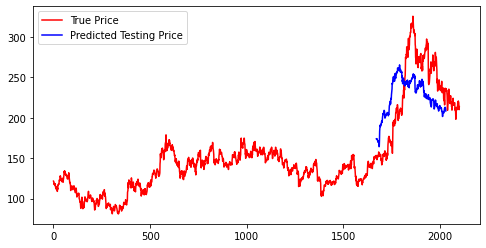

In [77]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#df["Date"]=pd.to_datetime(df.Date,format="%Y/%m/%d")
#df.index=df['Date']

print(final_dataset)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(final_dataset, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

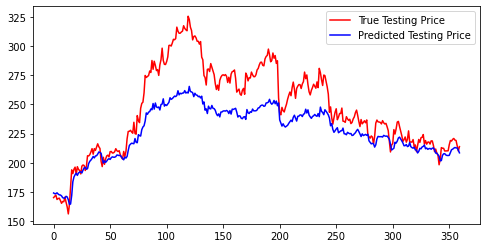

In [73]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [17]:
x = x_test[-1]
num_timesteps = 100
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[119.52492, 553.8407, 582.647, 614.43115, 622.7945, 628.86273, 631.4369, 632.9827, 633.78424, 634.2505, 634.5137, 634.6684, 634.7591, 634.8132, 634.8454, 634.86444, 634.87555, 634.8819, 634.8854, 634.88696, 634.8872, 634.88727, 634.88666, 634.8858, 634.885, 634.8842, 634.8834, 634.8827, 634.88196, 634.8813, 634.88074, 634.8802, 634.87994, 634.8795, 634.87915, 634.8788, 634.8784, 634.8782, 634.878, 634.8779, 634.8779, 634.8777, 634.8776, 634.87756, 634.87744, 634.8771, 634.8759, 634.8738, 634.8703, 634.86615, 634.86273, 634.87195, 634.872, 634.872, 634.872, 634.8719, 634.872, 634.87195, 634.8719, 634.87195, 634.8719, 634.8719, 634.8719, 634.8719, 634.8719, 634.8719, 634.8719, 634.87195, 634.8719, 634.87195, 634.87195, 634.8719, 634.87195, 634.87195, 634.8719, 634.8719, 634.87195, 634.8719, 634.872, 634.8719, 634.8719, 634.87195, 634.87195, 634.87195, 634.8719, 634.87195, 634.8719, 634.87195, 634.8719, 634.8719, 634.8719, 634.87195, 634.87195, 634.87195, 634.8719, 634.872, 634.87195, 634